In [15]:
### Data Collection
import pandas_datareader as pdr
key="" #download key from https://www.tiingo.com/documentation/forex

In [16]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/tmp/ipykernel_155814/1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [17]:
df.to_csv('AAPL.csv')

In [18]:
import pandas as pd

In [19]:
df=pd.read_csv('AAPL.csv')

In [20]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-04 00:00:00+00:00,228.36,229.18,226.63,228.41,27390132,54.673002,54.869323,54.258813,54.684973,109560528,0.0,1.0
1,AAPL,2018-09-05 00:00:00+00:00,226.87,229.67,225.10,228.99,33332960,54.316273,54.986637,53.892507,54.823834,133331840,0.0,1.0
2,AAPL,2018-09-06 00:00:00+00:00,223.10,227.35,221.30,226.23,34289976,53.413675,54.431192,52.982726,54.163047,137159904,0.0,1.0
3,AAPL,2018-09-07 00:00:00+00:00,221.30,225.37,220.71,221.85,37619810,52.982726,53.957149,52.841471,53.114405,150479240,0.0,1.0
4,AAPL,2018-09-10 00:00:00+00:00,218.33,221.85,216.47,220.95,39516453,52.271661,53.114405,51.826348,52.898931,158065812,0.0,1.0


In [21]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-08-24 00:00:00+00:00,176.38,181.104,176.010,180.674,54945798,176.38,181.104,176.010,180.674,54945798,0.0,1.0
1252,AAPL,2023-08-25 00:00:00+00:00,178.61,179.150,175.820,177.380,51449594,178.61,179.150,175.820,177.380,51449594,0.0,1.0
1253,AAPL,2023-08-28 00:00:00+00:00,180.19,180.590,178.545,180.090,43820697,180.19,180.590,178.545,180.090,43820697,0.0,1.0
1254,AAPL,2023-08-29 00:00:00+00:00,184.12,184.900,179.500,179.695,53003948,184.12,184.900,179.500,179.695,53003948,0.0,1.0
1255,AAPL,2023-08-30 00:00:00+00:00,187.65,187.850,184.740,184.940,60585683,187.65,187.850,184.740,184.940,60585683,0.0,1.0


In [22]:
df1=df.reset_index()['close']

In [23]:
df1

0       228.36
1       226.87
2       223.10
3       221.30
4       218.33
         ...  
1251    176.38
1252    178.61
1253    180.19
1254    184.12
1255    187.65
Name: close, Length: 1256, dtype: float64

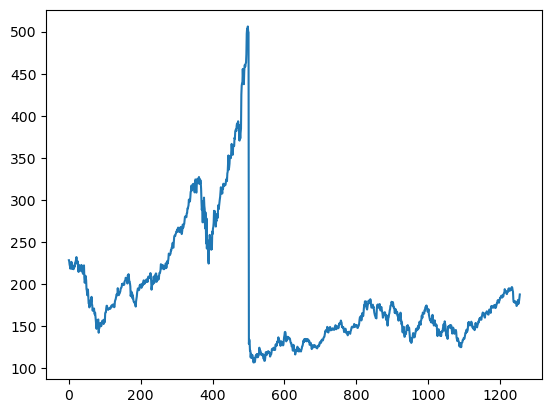

In [24]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [25]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [26]:
import numpy as np

In [27]:
df1

0       228.36
1       226.87
2       223.10
3       221.30
4       218.33
         ...  
1251    176.38
1252    178.61
1253    180.19
1254    184.12
1255    187.65
Name: close, Length: 1256, dtype: float64

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
print(df1)

[[0.3043707 ]
 [0.3006387 ]
 [0.29119599]
 ...
 [0.18371947]
 [0.19356293]
 [0.20240451]]


In [30]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [31]:
training_size,test_size

(816, 440)

In [32]:
train_data

array([[3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],
       [2.79248591e-01],
       [2.93074515e-01],
       [2.86111459e-01],
       [2.99486537e-01],
       [2.93049468e-01],
       [2.78121478e-01],
       [2.79023168e-01],
       [2.79348779e-01],
       [2.83506575e-01],
       [2.77570445e-01],
       [2.85410144e-01],
       [2.88916719e-01],
       [2.84483406e-01],
       [2.95829681e-01],
       [2.97808391e-01],
       [3.01615529e-01],
       [3.06675016e-01],
       [3.13663118e-01],
       [3.03443957e-01],
       [2.94176581e-01],
       [2.92874139e-01],
       [3.00638698e-01],
       [2.74314339e-01],
       [2.69530369e-01],
       [2.88716343e-01],
       [2.76819036e-01],
       [2.88816531e-01],
       [2.86412023e-01],
       [2.73462743e-01],
       [2.81703193e-01],
       [2.85059487e-01],
       [2.90269255e-01],
       [2.71133375e-01],
       [2.82930495e-01],
       [2.74164058e-01],
       [2.63994991e-01],


In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [36]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [37]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-08-31 05:27:02.610415: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 05:27:02.731651: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 05:27:02.732669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 05:27:03.659648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [39]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2023-08-31 05:27:04.715122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-31 05:27:04.716466: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 220ms/step - loss: 0.0281 - val_loss: 6.0680e-04
Epoch 2/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0126 - val_loss: 0.0012
Epoch 3/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0098 - val_loss: 4.1203e-04
Epoch 4/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0091 - val_loss: 0.0015
Epoch 5/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0085 - val_loss: 7.4585e-04
Epoch 6/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0079 - val_loss: 8.0640e-04
Epoch 7/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0067 - val_loss: 2.9272e-04
Epoch 8/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0058 - val_loss: 3.4994e-04
Epoch 9/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0063 - val_loss: 3.1122e-04
Epoch 10/100
12/12 [==============================] - 1s 116ms/

In [43]:
import tensorflow as tf

In [44]:
tf.__version__

'2.13.0'

In [45]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 29ms/step


In [46]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [47]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.9543229795623

In [48]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

156.07292232892

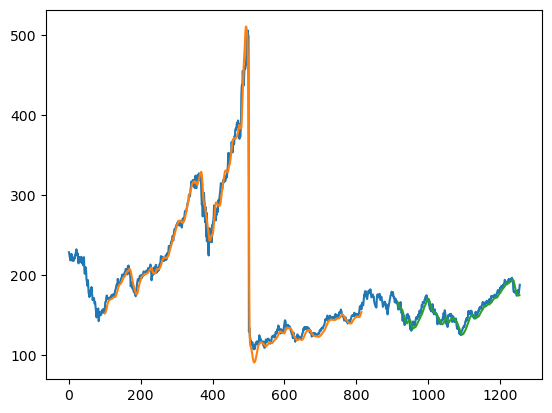

In [49]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
len(test_data)

440

In [51]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
temp_input

[0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0

In [57]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211
 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202
 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374
 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428
 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755
 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266
 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008 0.17815905
 0.1777082  0.18189105 0.17685661 0.17465247 0.16821

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [59]:
import matplotlib.pyplot as plt

In [60]:
len(df1)

1256

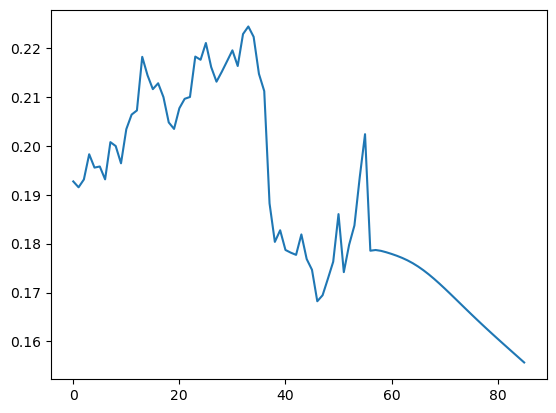

In [63]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [64]:
df3=scaler.inverse_transform(df3).tolist()

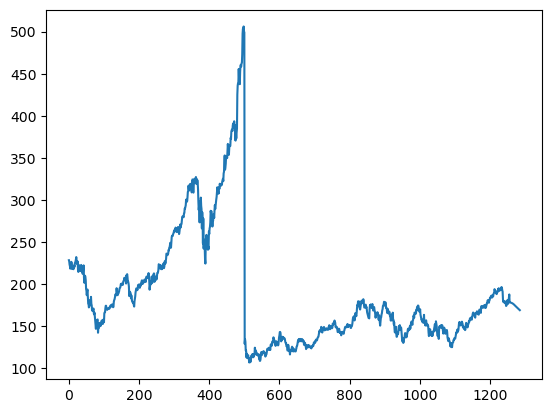

In [65]:
plt.plot(df3)